In [1]:
import csv
import pandas as pd
import script.load_data as ld
import script.statistics as stat
from sklearn import model_selection

In [2]:
# Load and clean data
df = ld.load_data()

,rischio totale,domanda finanziamento,outstanding,totale finanziato gruppo,totale finanziato,rating bplg,rating bnp,Assilea,canale di apporto,cliente anni,...,"Enveloppe loc, opérations Spé",Enveloppe location Transfert,Enveloppe location immobilier,Locaz. Finanziaria Immobiliare,Locazione Finanziaria,Locazione Operativa,Package credito,Package locazione,Riacquisto di crediti,target
0,101402.08,80000.00,21402.08,0.00,28000.0,6,6,0.0,NaN,0.9697802197802198,...,0,0,0,0,1,0,0,0,0,1
1,20000.00,20000.00,0.00,431900.00,0.0,6,6,0.0,6.0,NaN,...,0,0,0,0,1,0,0,0,0,1
2,48666.19,24042.20,24623.99,140401.07,25593.4,0,6,0.0,NaN,0.14560439560439561,...,0,0,0,0,0,1,0,0,0,1
3,31000.00,31000.00,0.00,0.00,0.0,6,6,0.0,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
4,19000.00,19000.00,0.00,0.00,0.0,7,6,0.0,5.0,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125701,17286.05,7546.25,9739.80,0.00,0.0,8,6,0.0,4.0,NaN,...,0,0,0,0,0,1,0,0,0,0
125705,2019.00,2019.00,0.00,0.00,0.0,6,6,0.0,6.0,NaN,...,0,0,0,0,0,1,0,0,0,0
125706,58000.00,58000.00,0.00,0.00,0.0,9,6,0.0,5.0,NaN,...,0,0,0,0,1,0,0,0,0,0
125801,10058.90,10058.90,0.00,0.00,0.0,7,6,0.0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Visualize statistics and basic info
stat.missing_values(df)

,Missing Ratio
gruppo cliente anni,88.516025
cliente anni,69.075907
canale di apporto,51.292324
Assilea,0.003768


In [17]:
df = df.drop(columns=['gruppo cliente anni', 'cliente anni'])

In [18]:
# L'80% delle pratiche vengono accettate
df['target'].describe()

count    79624.000000
mean         0.790101
std          0.407239
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [20]:
# Proviamo cob XGBoost
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

model = xgboost.XGBClassifier()

kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/Caskroom/miniconda/base/envs/onepass/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 85.31% (0.31%)


In [26]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

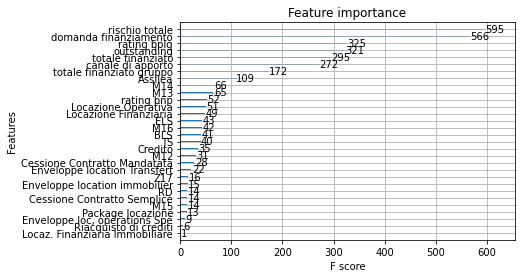

In [31]:
import matplotlib.pyplot as plt
xgboost.plot_importance(model)
plt.show()

In [ ]:
# Proviamo con CatBoost

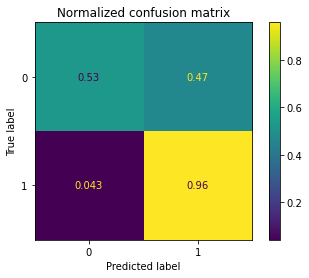

In [32]:
# Plot normalized confusion matrix
# Sostituire con X_test e y_test solo alla fine
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_train, y_train, 
                      labels=None, sample_weight=None, normalize='true', 
                      display_labels=None, include_values=True, xticks_rotation='horizontal', 
                      values_format=None, cmap='viridis', ax=None)
disp.ax_.set_title("Normalized confusion matrix")
plt.show()